# Exploratory Data Analysis (EDA)

This notebook will be performing EDA on the World Disasters dataset.

This dataset (downloaded from Kaggle) houses natural disaster data from EM-DAT (Emergency Events Database). The official description of the dataset found from the EM-DAT website can be found below: 

Since its creation in 1988, the Emergency Events Database (EM-DAT) has undergone many changes. Tracing these changes over time was a difficult task that required combing through the archives to reconstruct the history of the database structure, concepts, and definitions. This versioned documentation gives you a rigorous tool which you can use to track its evolution and access up-to-date information.

##### Import packages and dataset

In [1]:
# Package imports for this notebook 
import os # package to traverse the directories on your computer
import pandas as pd # dataframe reading, writing, and manipulation
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library 

In [3]:
# Path to data
# Change directories to path
data_path = "/Users/umreenimam/Documents/BMCC/Lesson Materials/Weeks 3 - 4/Week 3 Lab"
os.chdir(data_path)

In [4]:
# Import data
df = pd.read_excel("public_emdat_project.xlsx")

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage,"Total Damage, Adjusted",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [6]:
# Inspect shape
print("\nThe shape of the data:")
print(df.shape)
print("\n")

# Inspect columns
print("\nList all columns:")
print(df.columns)



The shape of the data:
(15784, 46)



List all columns:
Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage', 'Total Damage, Adjusted', 'CPI', 'Admin Units',
       'Entry Date', 'Last Update'],
      dtype='object')


##### View data shape and count how many missing values there are

In [86]:
# 1. Inspecting Data

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Checking the structure and information about the dataset
print("\nDataset Information:")
print(df.info())

# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())


First 5 rows of the dataset:
          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype Event Name  ISO   Country  ... Start Day  \
0       Drought          Drought        NaN  DJI  Djibouti  ...       NaN   
1       Drought          Drought        NaN  SDN     Sudan  ...       NaN   
2       Drought          Drought        NaN  SOM   Somalia  ...       NaN   
3          Road             Road        NaN  AGO    Angola  ...      26.0   
4         Flood   Riverine flood        NaN  AGO    Angola  ...       8.0   

  End Year End Month 

##### Handle missing values

In [7]:
# View count of missing values
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      

In [8]:
# Fill in missing values using fillna()
# Skip columns like latitude, longitude, etc. 
skip_cols = ["Latitude", "Longitude", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]

# Get a list of columns to fill excluding the skipped columns 
fill_cols = df.columns.difference(skip_cols)

# Fill NaN values that are found only in the fill_cols list
# Use .apply() to apply a function to each value in a column
# In this case we are filling the NaN values with the median as the median is the least vunerable to outliers
df[fill_cols] = df[fill_cols].apply(lambda x: x.fillna(x.median()) if x.dtype in ['float64', 'int64'] else x)

# View count of missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

# OPTIONAL ITEMS
# # Data Cleaning (Handle missing data if any)
# # Example: Fill missing values in numeric columns with the median
# df.fillna(df.median(numeric_only = True), inplace = True)

# # Example: Dropping rows with missing values in important columns like 'Disaster_Type' or 'Country'
# df.dropna(subset = ["Start Year", "Start Month", "Start Day", "Country"], inplace = True)




Missing values after handling:
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0

##### Start summarizing and visualizing different columns from the dataset


Unique Disaster Types:
['Drought' 'Road' 'Flood' 'Extreme temperature' 'Fire (Miscellaneous)'
 'Volcanic activity' 'Storm' 'Wildfire' 'Earthquake' 'Rail' 'Air'
 'Collapse (Industrial)' 'Collapse (Miscellaneous)' 'Fire (Industrial)'
 'Explosion (Miscellaneous)' 'Epidemic' 'Water' 'Mass movement (wet)'
 'Explosion (Industrial)' 'Chemical spill' 'Gas leak' 'Infestation'
 'Miscellaneous accident (General)' 'Poisoning' 'Mass movement (dry)'
 'Industrial accident (General)' 'Radiation' 'Oil spill' 'Impact'
 'Animal incident' 'Glacial lake outburst flood']


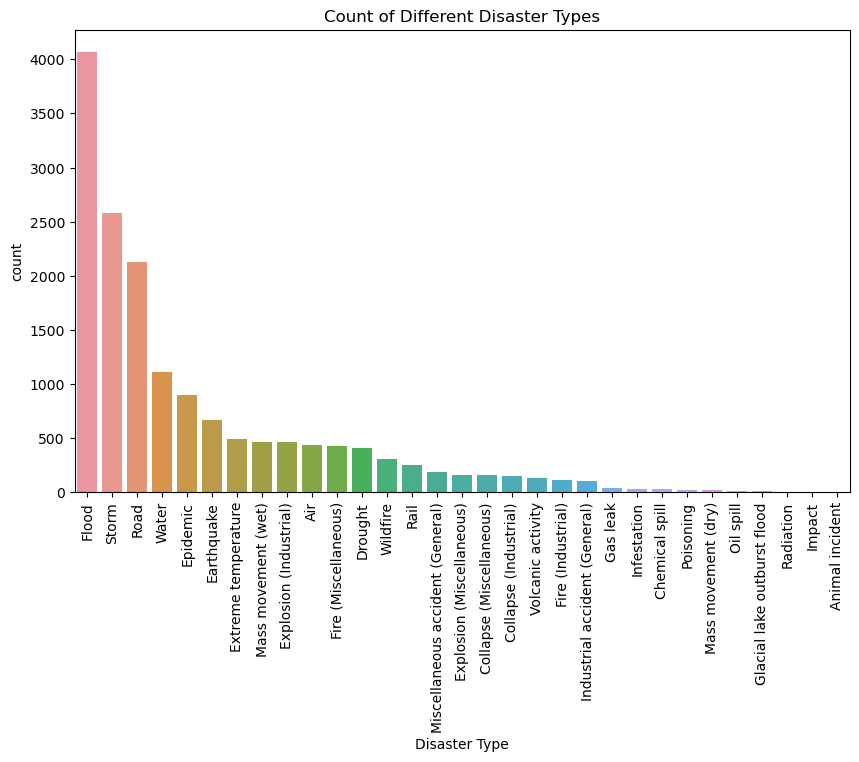

In [9]:
# Unique values in the 'Disaster Type' column
print("\nUnique Disaster Types:")
print(df['Disaster Type'].unique())

# Count plot for Disaster Types
# Set plot size
plt.figure(figsize = (10, 6))
# Configure the actual plot
sns.countplot(data = df, x = 'Disaster Type', order = df['Disaster Type'].value_counts().index)
# Set a title for the plot
plt.title('Count of Different Disaster Types')
# Rotate the x-axis values to display at a 90 degree angle
plt.xticks(rotation = 90)
# ALWAYS run this to show your plot 
plt.show()

/Users/umreenimam/anaconda3/envs/base_clone/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/umreenimam/anaconda3/envs/base_clone/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


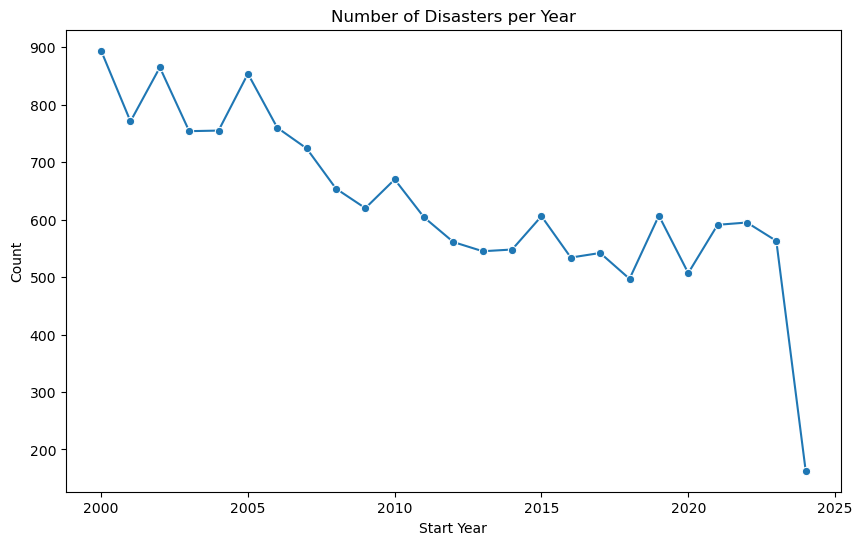

In [14]:
# Temporal Analysis using Year column

# Convert 'Year' column to datetime format if necessary
# NOT necessary in this case, so no need to run this
# df['Start Year'] = pd.to_datetime(df['Start Year'], format='%Y')

# Get the number of disasters per year by grouping by "Start Year" and counting how many times each year appears across the dataset
# REMEMBER: 'count' = count values excluding NaNs and 'size' = count all values including NaNs 
# REMEMBER: in this case do not drop the index as it will remove all "Start Year" values 
disaster_per_year = df.groupby("Start Year").agg(Count = pd.NamedAgg("Start Year", "count")).sort_values("Start Year").reset_index(drop = False)
disaster_per_year

# Number of disasters per year line plot
plt.figure(figsize = (10, 6))
sns.lineplot(data = disaster_per_year, x = "Start Year", y = "Count", marker = "o")
plt.title('Number of Disasters per Year')
plt.show()

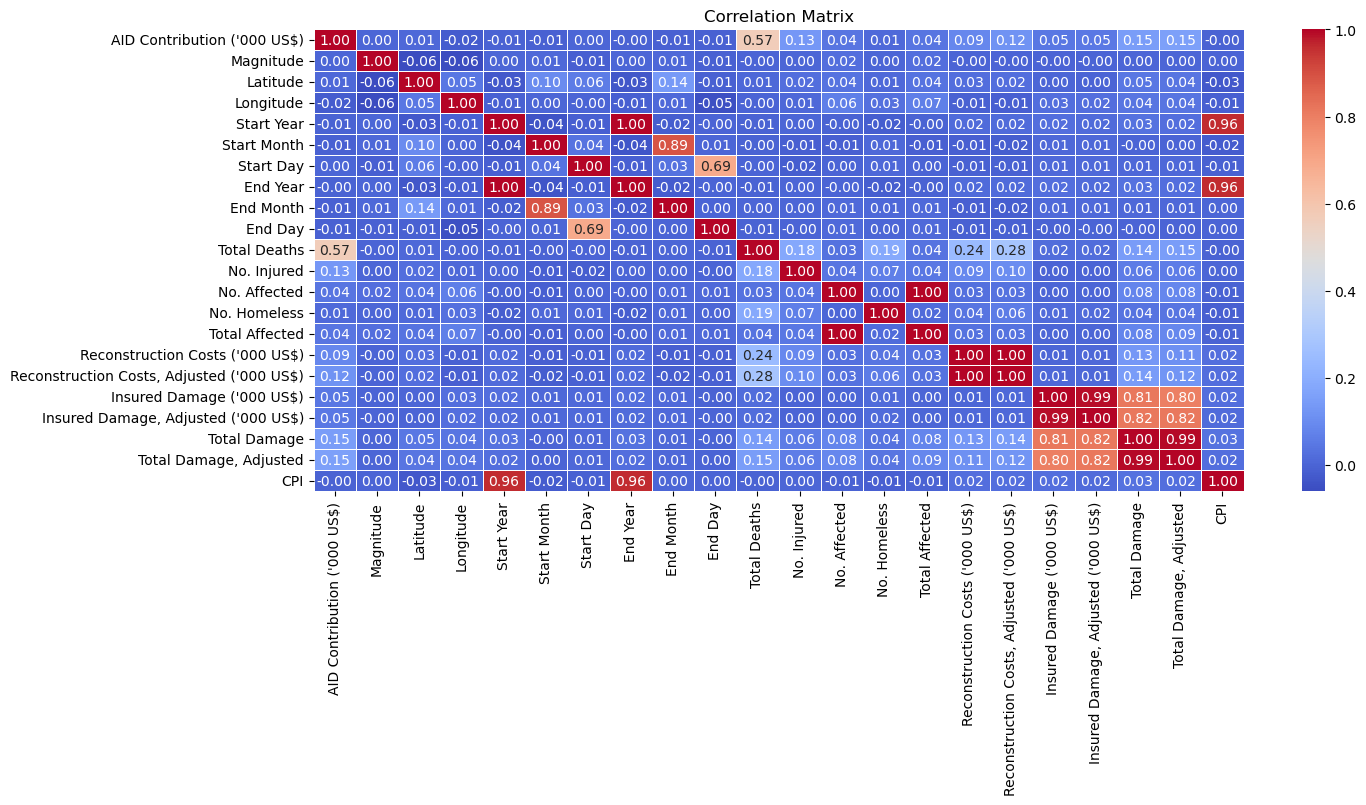

In [15]:
# Correlation matrix for numerical variables
# Let's see if there are any columns that are correlated with one another
# Only run the .corr() function on numeric values
numeric_df = df.select_dtypes(include = ["number"])

# Create plot
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

# Use this plot to understand which columns are highly correlated and which ones are not


Disaster counts by country:
Disaster Type     Air  Animal incident  Chemical spill  Collapse (Industrial)  \
Country                                                                         
Afghanistan    11.000            0.000           0.000                  2.000   
Albania         0.000            0.000           0.000                  0.000   
Algeria         5.000            0.000           0.000                  0.000   
American Samoa  0.000            0.000           0.000                  0.000   
Angola         10.000            0.000           1.000                  0.000   

Disaster Type   Collapse (Miscellaneous)  Drought  Earthquake  Epidemic  \
Country                                                                   
Afghanistan                        3.000    6.000      21.000    16.000   
Albania                            0.000    0.000       4.000     1.000   
Algeria                            0.000    0.000       7.000     0.000   
American Samoa              

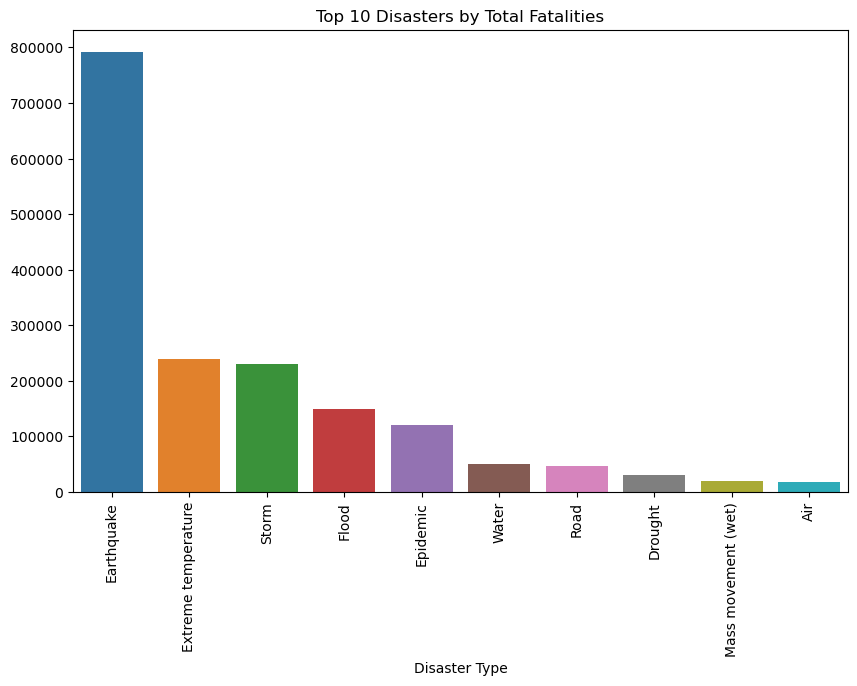

In [18]:
# I want to remove the sicentific notation format for a lot of the columns, to do so use the following
# Change format of decimals to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Most frequent disaster types by country
disaster_by_country = df.groupby('Country')['Disaster Type'].value_counts().unstack().fillna(0)
print("\nDisaster counts by country:")
print(disaster_by_country.head())

# Highest number of fatalities per disaster type
fatalities_by_disaster = df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending = False)
print("\nTotal fatalities by disaster type:")
print(fatalities_by_disaster)

# Economic damage by disaster type
damage_by_disaster = df.groupby('Disaster Type')["Total Damage, Adjusted"].sum().sort_values(ascending = False)
print("\nTotal Damage (USD) by disaster type:")
print(damage_by_disaster)

# Visualize the top 10 disasters by fatalities
top_disasters = df.groupby('Disaster Type')['Total Deaths'].sum().nlargest(10)
plt.figure(figsize = (10, 6))
sns.barplot(x = top_disasters.index, y = top_disasters.values)
plt.title('Top 10 Disasters by Total Fatalities')
plt.xticks(rotation = 90)
plt.show()

In [95]:
# View countries with the percentage of top fatalities 
top_countries_fatalities = (df.groupby('Country')['Total Deaths'].sum().nlargest(5) / df['Total Deaths'].sum()) * 100
top_countries_fatalities

Country
Haiti       14.017
Indonesia   11.410
Myanmar      8.211
China        7.786
India        5.962
Name: Total Deaths, dtype: float64

In [20]:
# Determine what percentage of total damage is caused by each disaster type
damage_percent_by_disaster = (df.groupby('Disaster Type')["Total Damage, Adjusted"].sum() / df["Total Damage, Adjusted"].sum()) * 100
damage_percent_by_disaster.sort_values(ascending = False).reset_index()


,Disaster Type,"Total Damage, Adjusted"
0,Storm,36.874
1,Flood,21.729
2,Earthquake,14.985
3,Road,4.701
4,Drought,4.448
5,Wildfire,2.656
6,Water,2.459
7,Extreme temperature,2.132
8,Epidemic,1.979
9,Explosion (Industrial),1.749
